In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Advanced Learning Algorithms/Week 2/C2W2A1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Advanced Learning Algorithms/Week 2/C2W2A1


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

# Neural Network Model

## Loading Data

In [4]:
X = np.load('data/X.npy')
y = np.load('data/y.npy')

In [10]:
print(f'The shape of X is {X.shape}')
print(f'The shape of y is {y.shape}')

The shape of X is (5000, 400)
The shape of y is (5000, 1)


## Data Visualization

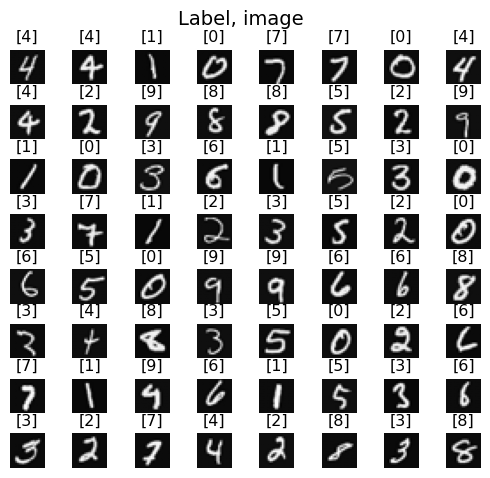

In [25]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize = (5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)

  random_image = X[random_index]

  ax.imshow(random_image.reshape(20,20).T, cmap = 'gray')
  ax.set_title(y[random_index])
  ax.axis('off')

  fig.suptitle("Label, image", fontsize=14)



In [35]:
input_size = X.shape[1]
HDR = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')
    ], name = 'my_model'
)

In [37]:
HDR.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
)

In [40]:
HDR.fit(X, y, epochs = 30)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0875
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0804
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0728
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0683
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0658
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0596
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0534
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0546
Epoch 10/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0487
Epoch 11/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0472
Epoch 12/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0443
Epoch 13/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0404
Epoch 14/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0402
Epoch 15/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [72]:
pred_v = HDR.predict(X)
prediction = np.argmax(pred_v, axis = 1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 0.98, 'Label, image')

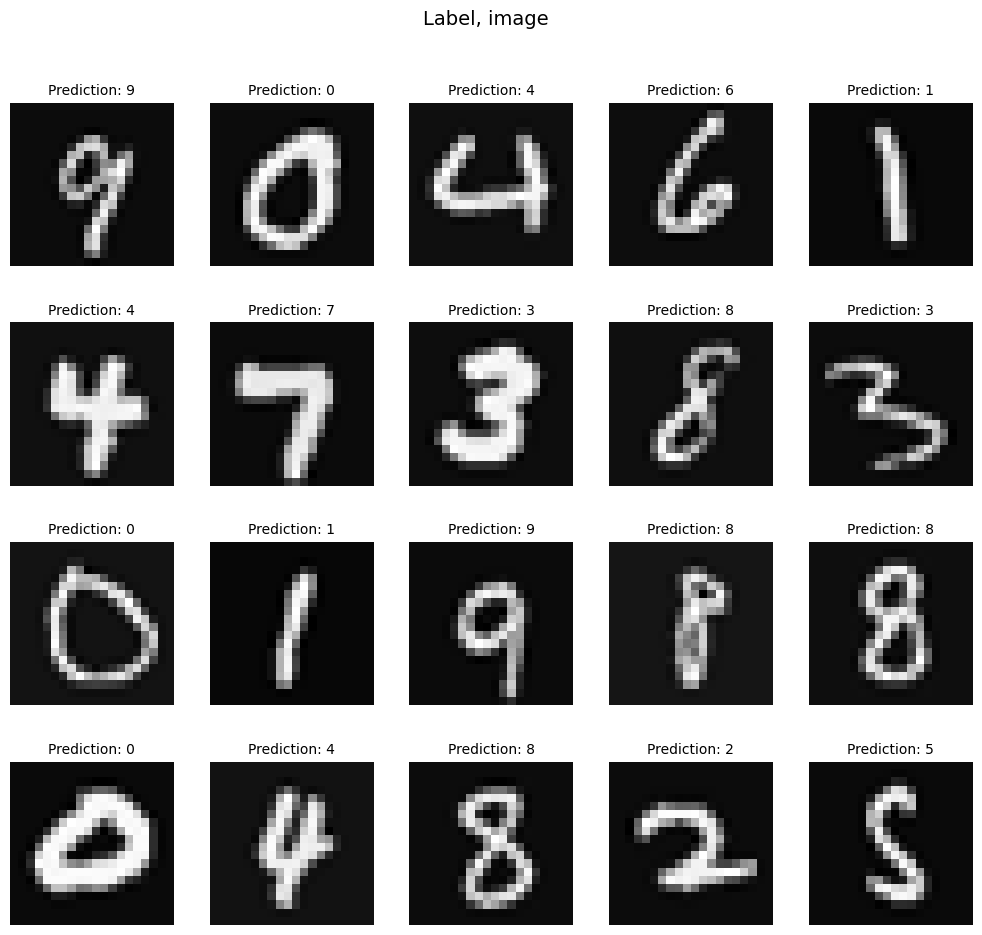

In [73]:
random_index = np.random.randint(1, 4999 , size = 20)

fig, axes = plt.subplots(4,5, figsize = (10, 10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
  index = random_index[i]
  ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
  ax.set_title(f'Prediction: {prediction[index]}', fontsize = 10)
  ax.axis('off')

fig.suptitle("Label, image", fontsize=14)

In [78]:
prediction = prediction.reshape(-1,1)
incorrect_pred = np.where(prediction != y)[0]
print(f'There are {len(incorrect_pred)} incorrect predictions')

There are 1 incorrect predictions


Text(0.5, 0.98, 'Label, image')

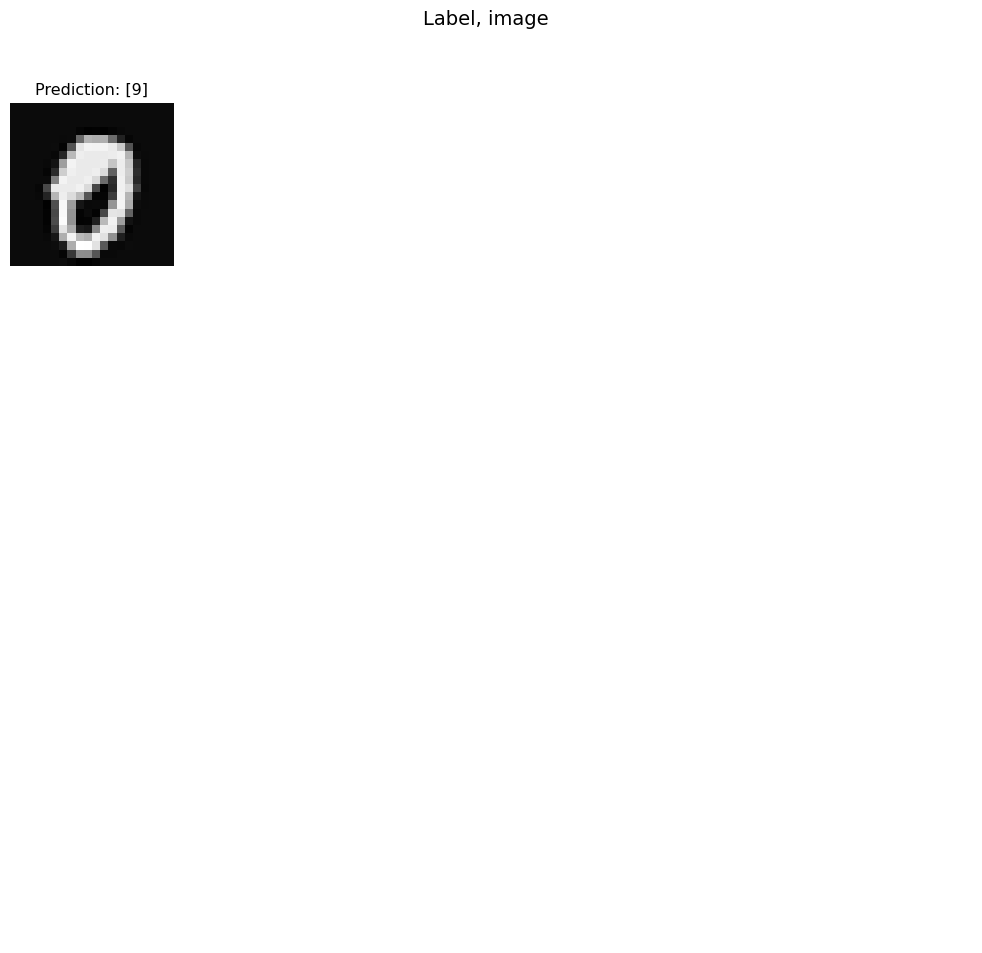

In [81]:
fig, axes = plt.subplots(4,5, figsize = (10, 10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
  if i < len(incorrect_pred):
    index = incorrect_pred[i]
    ax.imshow(X[index].reshape(20,20).T, cmap = 'gray')
    ax.axis('off')
    ax.set_title(f'Prediction: {prediction[index]}')

  else:
    ax.axis('off')
fig.suptitle("Label, image", fontsize=14)
